# Feature Importance

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X = df.drop("class", axis = 1)
y = df["class"]

X_encoded = pd.get_dummies(X, prefix_sep = "_")
y_encoded = LabelEncoder().fit_transform(y)

X_scaled = StandardScaler().fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.3, random_state = 0)

start = time.process_time()
model = RandomForestClassifier(n_estimators = 700).fit(X_train, y_train)
print(time.process_time() - start)

1.71875


In [4]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1272    0]
 [   0 1166]]


In [5]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



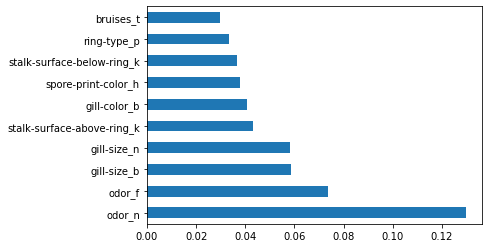

In [6]:
feature_imp = pd.Series(model.feature_importances_, index = X_encoded.columns)
feature_imp.nlargest(10).plot(kind = "barh") # En yüksek 10 tanesi
plt.show()

# En iyi 4 tanesi ile model kuralım.

In [7]:
best_feat = feature_imp.nlargest(4).index
best_feat

Index(['odor_n', 'odor_f', 'gill-size_b', 'gill-size_n'], dtype='object')

In [8]:
X_reduced = X_encoded[best_feat]
Xr_scaled = StandardScaler().fit_transform(X_reduced)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, y_encoded, test_size = 0.3, random_state = 0)

start = time.process_time()
rmodel = RandomForestClassifier(n_estimators = 700).fit(Xr_train, yr_train)
print(time.process_time() - start)

1.0


In [9]:
yr_pred = rmodel.predict(Xr_test)
print(confusion_matrix(yr_test, yr_pred))

[[1239   33]
 [  41 1125]]


In [10]:
print(classification_report(yr_test, yr_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1272
           1       0.97      0.96      0.97      1166

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438

